In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. Pendulum

다음처럼 주어지는 진자의 운동방정식을 풀어라.
$$ \frac{d^2 \theta}{dt^2}  + \frac{g}{L} \sin \theta = 0. $$ 
$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 
$\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 
여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.  

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.
$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \frac{g}{L} \sin \theta . $$ 

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

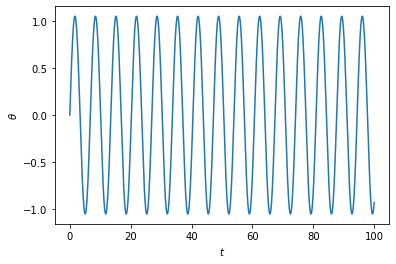

In [115]:
ratio=1 #g/L
state0=[0,1] 
t = np.arange(0.0, 100.0, 0.01)

def func1(state,t):
    theta,omega=state
    return omega,-ratio*np.sin(theta)
sol1=odeint(func1,state0,t)
plt.plot(t,sol1[:,0],label=r'$\theta (t)$')
plt.ylabel(r'$ \theta$')
plt.xlabel('$t$')
plt.show()

# 2. Pendulum (small oscillations)

1번 문제와 같은 진자에 대해 평형점 근처에서 조금씩 진동하고 있는 상황을 고려하자. 그러면  
$\sin\theta \approx \theta$ 근사를 적용할 수 있다. 

이 경우는 다음과 같은 2개의 1차 미분방정식을 얻는다. 
$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} =  - \frac{g}{L} \theta . $$ 

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 초기 조건 $\theta_o, w_o$를 바꾸어 가면서 1번 문제의 결과와 비교해보자.

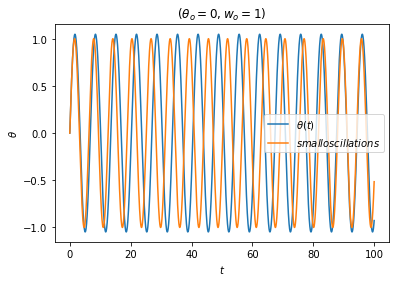

In [116]:
def func2(state,t):
    theta,omega=state
    return omega,-ratio*theta
sol2=odeint(func2,[0,1],t)
plt.plot(t,sol1[:,0],label=r'$\theta (t)$')
plt.plot(t,sol2[:,0],label=r'$small oscillations$')
plt.legend()
plt.title(r'$(\theta_o=0, w_o=1)$')
plt.ylabel(r'$ \theta$')
plt.xlabel('$t$')
plt.show()

t가 커질수록 근사가 맞지 않는다

# 3. Damped Pendulum

다음처럼 주어지는 damped 진자의 운동방정식을 풀어라.
$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$ 
$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 

우선 2차 미분방정식을 2개의 1차 미분방정식으로 분리해 보자.
$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$ 

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

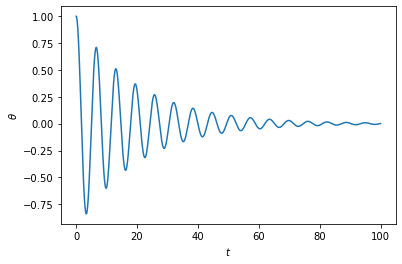

In [117]:
beta=0.1
def func3(state,t): # state=[theta,omega]
    theta,omega=state
    return omega,-beta*omega-ratio*np.sin(theta)
sol3=odeint(func3,[1,0],t)
plt.plot(t,sol3[:,0])
plt.ylabel(r'$ \theta$')
plt.xlabel('$t$')
plt.show()

# 4. Forced Pendulum

다음처럼 주어지는 forced 진자의 운동방정식을 풀어라.
$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = A \cos (v t). $$ 
$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도, $A$는 외부에서 주어지는 힘의 진폭, $v$는 외부에서 주어지는 힘의 진동수이다. 

forced 진자의 움직임을 구해보고 $v$의 효과에 대해 살펴보아라.

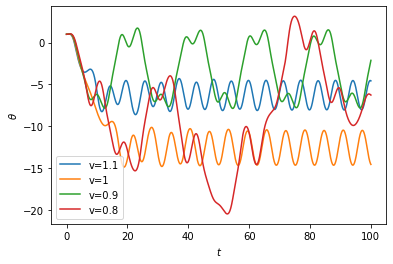

In [135]:

A=1
def func4(state,t):
    theta,omega=state
    return omega,A*np.cos(0.9*t)-beta*omega-ratio*np.sin(theta)
def func5(state,t):
    theta,omega=state
    return omega,A*np.cos(0.8*t)-beta*omega-ratio*np.sin(theta)
def func6(state,t):
    theta,omega=state
    return omega,A*np.cos(1*t)-beta*omega-ratio*np.sin(theta)
def func7(state,t):
    theta,omega=state
    return omega,A*np.cos(1.1*t)-beta*omega-ratio*np.sin(theta)
sol4=odeint(func4,[1,0],t)
sol5=odeint(func5,[1,0],t)
sol6=odeint(func6,[1,0],t)
sol7=odeint(func7,[1,0],t)
plt.plot(t,sol7[:,0], label='v=1.1')
plt.plot(t,sol6[:,0], label='v=1')
plt.plot(t,sol4[:,0], label='v=0.9')
plt.plot(t,sol5[:,0], label='v=0.8')
plt.ylabel(r'$ \theta$')
plt.xlabel('$t$')
#plt.plot(t,sol3[:,0],label='damped')
plt.legend()
plt.show()
#chaos?